In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

FEATURES = ["Open", "High", "Low", "Last", "Close"]
TIME_SIZE = 60
FEATURE_SIZE = len(FEATURES)

Loading data

In [64]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

dataset_train = dataset_train[::-1].reset_index()[FEATURES]
dataset_train_scaled = scaler.fit_transform(dataset_train)
dataset_train_scaled.shape

(2035, 5)

In [81]:
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler(feature_range=(0,1))
# training_set_scaled = sc.fit_transform(training_set)
# training_set_scaled

Normalize dataset
Create Training and Testing dataset

In [91]:
X_train = []
y_train = []
for i in range(TIME_SIZE, dataset_train_scaled.shape[0]):
    X_train.append(dataset_train_scaled[i-TIME_SIZE:i, ])
    y_train.append(dataset_train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train.shape, y_train.shape

((1975, 60, 5), (1975,))

In [92]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense 

In [93]:
model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(TIME_SIZE, FEATURE_SIZE)))
model.add(Dropout(0.2))

# model.add(LSTM(units=50,return_sequences=True))
# model.add(Dropout(0.2))

# model.add(LSTM(units=50,return_sequences=True))
# model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
1975/1975 [==============================] - 3s 2ms/step - loss: 0.0099
Epoch 2/100
1975/1975 [==============================] - 3s 1ms/step - loss: 0.0025
Epoch 3/100
1975/1975 [==============================] - 2s 1ms/step - loss: 0.0020
Epoch 4/100
1975/1975 [==============================] - 3s 1ms/step - loss: 0.0018
Epoch 5/100
1975/1975 [==============================] - 2s 1ms/step - loss: 0.0017
Epoch 6/100
1975/1975 [==============================] - 3s 1ms/step - loss: 0.0018
Epoch 7/100
1975/1975 [==============================] - 2s 1ms/step - loss: 0.0015
Epoch 8/100
1975/1975 [==============================] - 2s 1ms/step - loss: 0.0016
Epoch 9/100
1975/1975 [==============================] - 3s 1ms/step - loss: 0.0014
Epoch 10/100
1975/1975 [==============================] - 2s 1ms/step - loss: 0.0014
Epoch 11/100
1975/1975 [==============================] - 3s 1ms/step - loss: 0.0015
Epoch 12/100
1975/1975 [==============================] - 2s 1ms/step - lo

1975/1975 [==============================] - 3s 1ms/step - loss: 5.2097e-04
Epoch 95/100
1975/1975 [==============================] - 3s 1ms/step - loss: 5.5290e-04
Epoch 96/100
1975/1975 [==============================] - 3s 1ms/step - loss: 4.7543e-04
Epoch 97/100
1975/1975 [==============================] - 3s 1ms/step - loss: 5.9547e-04
Epoch 98/100
1975/1975 [==============================] - 3s 1ms/step - loss: 5.2683e-04
Epoch 99/100
1975/1975 [==============================] - 3s 1ms/step - loss: 4.4375e-04
Epoch 100/100
1975/1975 [==============================] - 3s 1ms/step - loss: 4.8855e-04


In [97]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 1:2].values
pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

0     234.05
1     234.55
2     240.00
3     233.30
4     233.55
       ...  
11    208.00
12    217.00
13    223.50
14    230.00
15    234.55
Name: Open, Length: 2051, dtype: float64

In [59]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - TIME_SIZE:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(TIME_SIZE, 76):
    X_test.append(inputs[i-TIME_SIZE:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

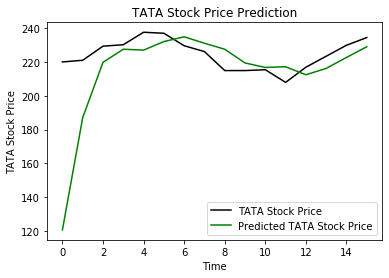

In [60]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

In [62]:
X_train.shape[1]

60